In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

data = pd.read_csv(r"C:\Users\ITMS-System-25\Desktop\online_shoppers_intention.csv")
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
data.shape

(12330, 18)

In [4]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
data.duplicated().sum()

125

In [8]:
df = data.copy()
df = df.drop_duplicates()

<Axes: >

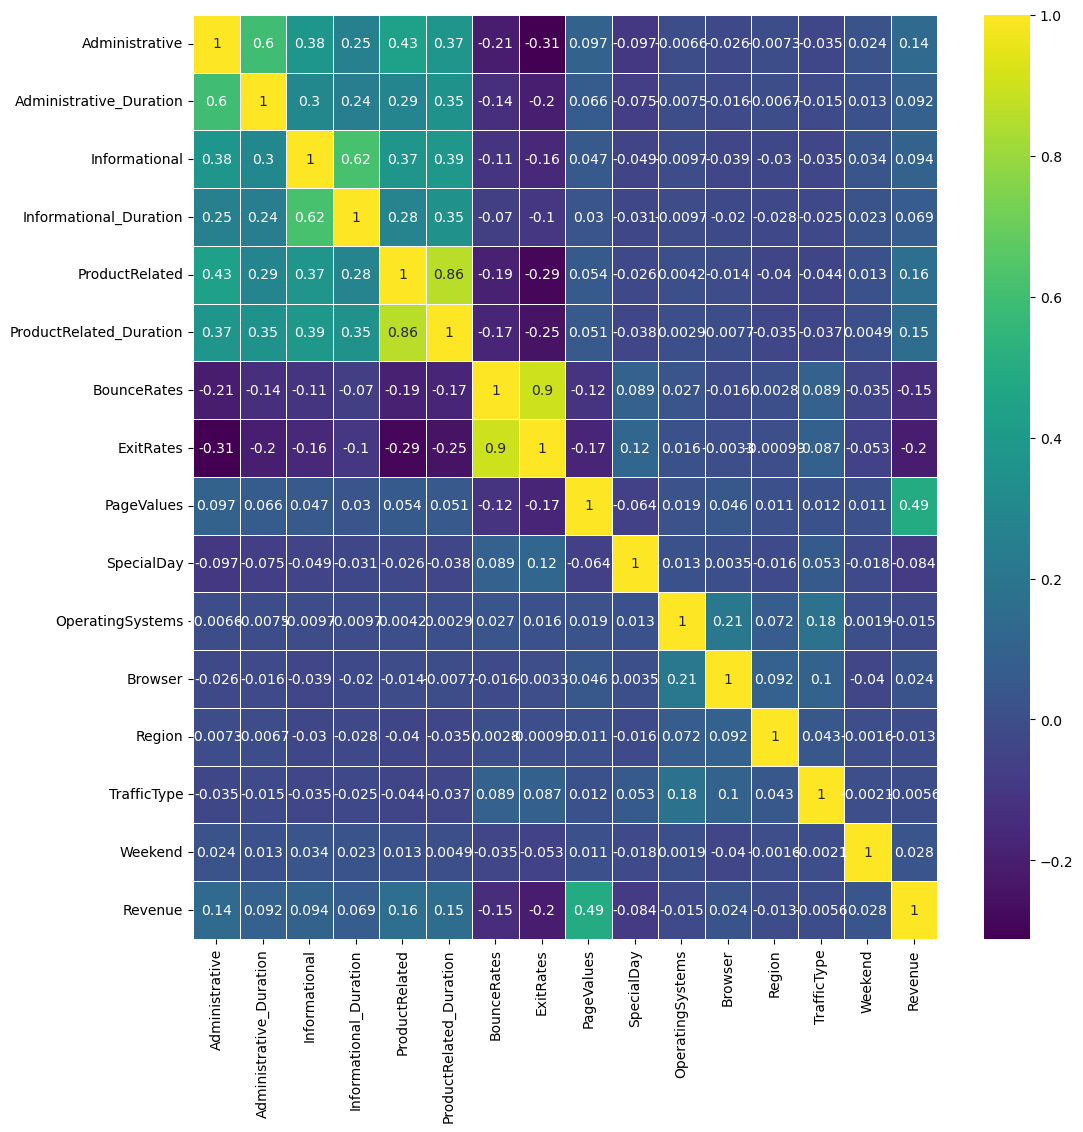

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap="viridis", linewidths=.5)

<Axes: xlabel='Month', ylabel='count'>

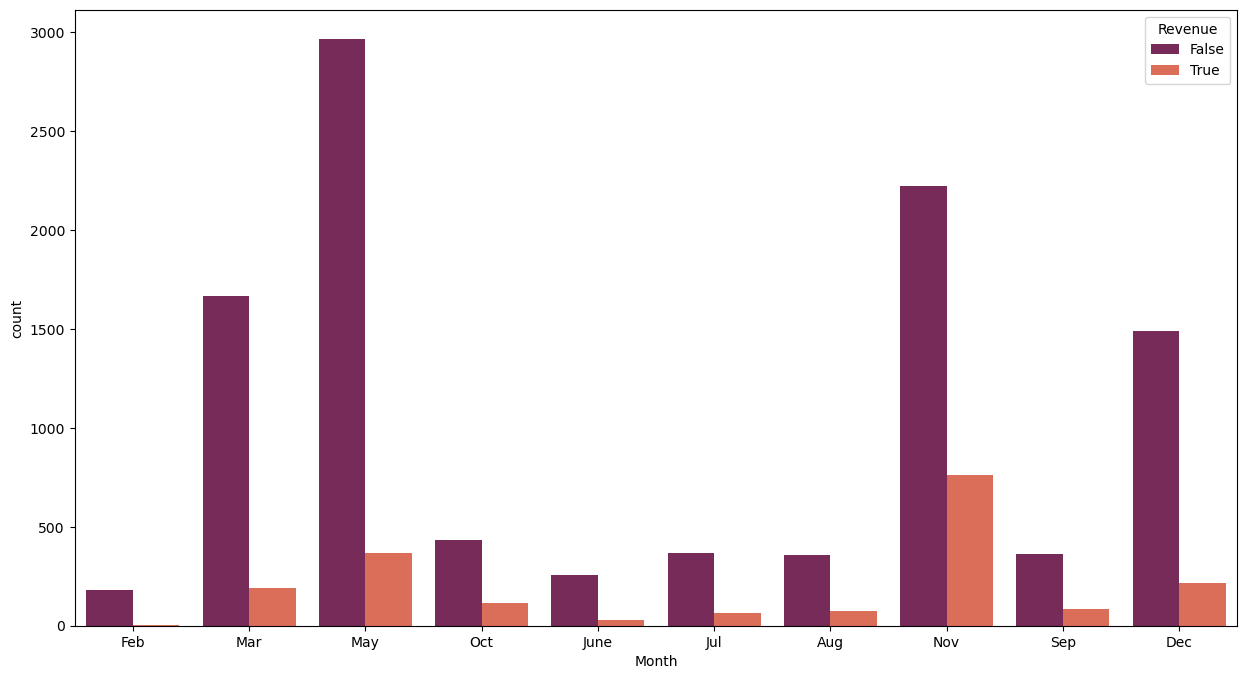

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='Month', hue='Revenue', palette='rocket')

In [12]:
df = df.drop(['Administrative', 'Informational', 'ProductRelated_Duration'], axis=1)

In [14]:
df['ProductRelated'].value_counts()

1      504
3      458
2      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: ProductRelated, Length: 311, dtype: int64

In [15]:
visitor = pd.get_dummies(df['VisitorType'])
X = pd.concat([df, visitor], axis = 1)
X.head()

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0,0,1
1,0.0,0.0,2,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0,0,1
2,0.0,0.0,1,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0,0,1
3,0.0,0.0,2,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0,0,1
4,0.0,0.0,10,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0,0,1


In [16]:
y = X['Revenue']
X_new = X.drop(['Revenue', 'Month', 'VisitorType'], axis = 1)
X_new

,Administrative_Duration,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,New_Visitor,Other,Returning_Visitor
0,0.0,0.0,1,0.200000,0.200000,0.000000,0.0,1,1,1,1,False,0,0,1
1,0.0,0.0,2,0.000000,0.100000,0.000000,0.0,2,2,1,2,False,0,0,1
2,0.0,0.0,1,0.200000,0.200000,0.000000,0.0,4,1,9,3,False,0,0,1
3,0.0,0.0,2,0.050000,0.140000,0.000000,0.0,3,2,2,4,False,0,0,1
4,0.0,0.0,10,0.020000,0.050000,0.000000,0.0,3,3,1,4,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,145.0,0.0,53,0.007143,0.029031,12.241717,0.0,4,6,1,1,True,0,0,1
12326,0.0,0.0,5,0.000000,0.021333,0.000000,0.0,3,2,1,8,True,0,0,1
12327,0.0,0.0,6,0.083333,0.086667,0.000000,0.0,3,2,1,13,True,0,0,1
12328,75.0,0.0,15,0.000000,0.021053,0.000000,0.0,2,2,3,11,False,0,0,1


In [21]:
X_new['Weekend'] = np.asarray(X_new['Weekend']).astype(np.float32)
y = np.asarray(y).astype(np.float32)
revenue_model = RandomForestClassifier()
revenue_model.fit(X_new, y)

RandomForestClassifier()

In [23]:
y_weekend = df['Weekend']
X_new1 = X.drop(['Revenue', 'Month', 'VisitorType', 'Weekend'], axis=1)
weekend_model = RandomForestClassifier()
weekend_model.fit(X_new1, y_weekend)


RandomForestClassifier()

In [24]:
y_informational_dur = df['Informational_Duration']
X_new2 = X.drop(['Revenue', 'Month', 'VisitorType','Weekend','Informational_Duration'], axis = 1)
info_model = RandomForestRegressor()
info_model.fit(X_new2, y_informational_dur)

RandomForestRegressor()

In [32]:
revenue_predict = revenue_model.predict(X_new)
weekend_predict = weekend_model.predict(X_new1)
info_predict = info_model.predict(X_new2)
revenue_accuracy = accuracy_score(y, revenue_predict)
weekend_accuracy = accuracy_score(y_weekend,  weekend_predict)

In [33]:
print("Revenue accuracy:", revenue_accuracy)
print("Weekend accuracy:", weekend_accuracy)

Revenue accuracy: 0.9998361327324867
Weekend accuracy: 0.9917247029905776


In [35]:
info_duration_mse = mean_squared_error(y_informational_dur, info_predict)
print("MSE of informational duration:", info_duration_mse)

MSE of informational duration: 2669.81246370087
